# Loan Approval Prediction

In [1]:
# !pip uninstall numpy
# !pip install numpy==1.23.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are NaN values in columns: Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

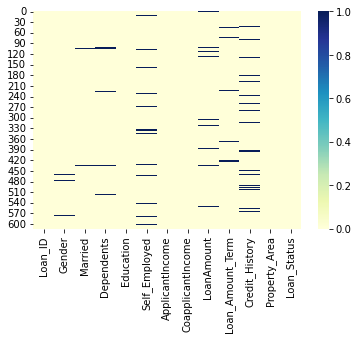

In [12]:
# Visualization for null vlue
sns.heatmap(train.isnull(),cmap="YlGnBu")
plt.show()

In [13]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Gender,Married,Education,Self_Employed,Credit_History,Loan_Status each have 2 unique elements,Dependents has 4 unique elements,Property Area has 3 unique elements.

## Dataframe Description:
#### Independent Variables:
Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

#### Dependent Variable (Target Variable):
Loan_Status

### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

#### This is a Classification Problem since the Target variable / Label column ("Loan_Status") has Catergorical type of Data.

In [14]:
train.fillna(method='ffill',inplace=True)

In [15]:
train.fillna(method='bfill',inplace=True)

In [16]:
test.fillna(method='ffill',inplace=True)

In [17]:
test.fillna(method='bfill',inplace=True)

In [18]:
train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
train.Married.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
train['Credit_History'].unique()

array([1., 0.])

In [24]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

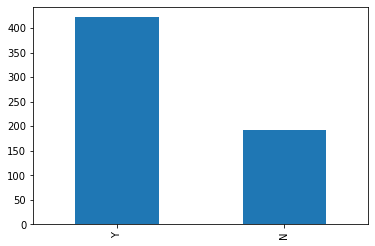

In [27]:
train['Loan_Status'].value_counts().plot.bar()

#### Analyzing Feature columns Catergorical Classes

<AxesSubplot:xlabel='Dependents', ylabel='count'>

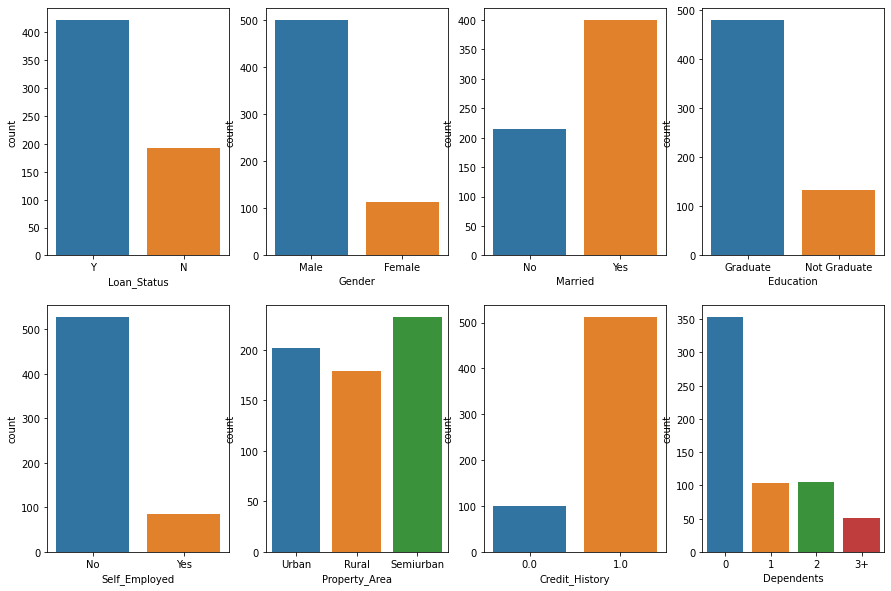

In [28]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(15,10))
sns.countplot(x='Loan_Status', data = train, ax=ax[0][0])
sns.countplot(x='Gender', data = train, ax=ax[0][1])
sns.countplot(x='Married', data = train, ax=ax[0][2])
sns.countplot(x='Education', data = train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = train, ax=ax[1][2])
sns.countplot(x='Dependents', data = train, ax=ax[1][3])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

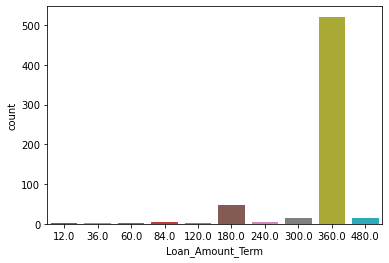

In [29]:
sns.countplot(x='Loan_Amount_Term', data = train)

#### Analyzing Feature columns with Continuous Data

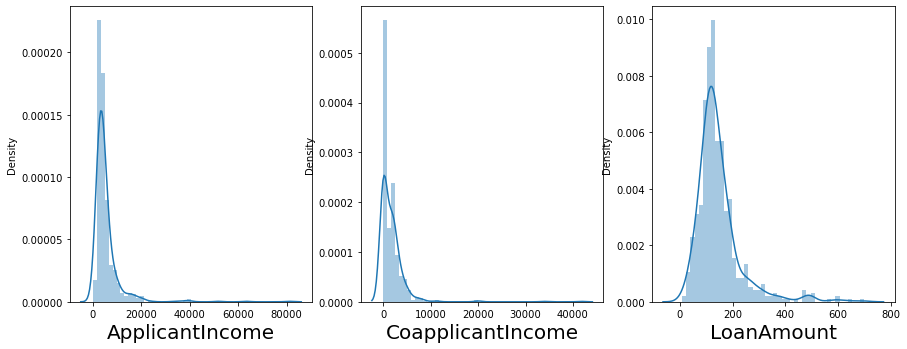

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(train[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is present in the data
ApplicantIncome, CoapplicantIncome and LoanAmount are left skewed

In [31]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.613890
dtype: float64

Bivariate Analysis:

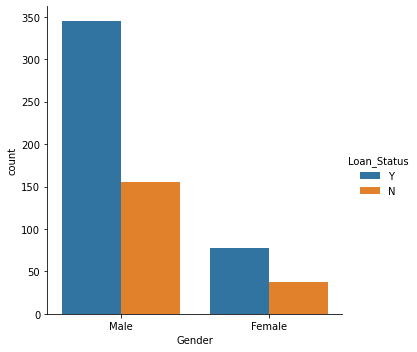

In [32]:
sns.factorplot('Gender',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

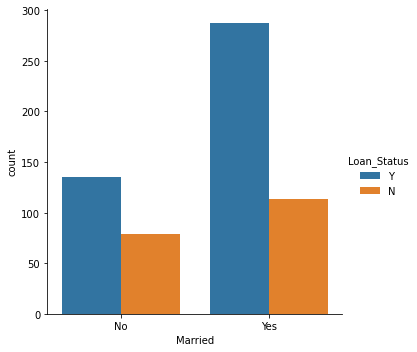

In [33]:
sns.factorplot('Married',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

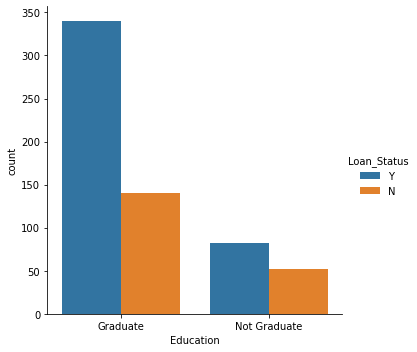

In [34]:
sns.factorplot('Education',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

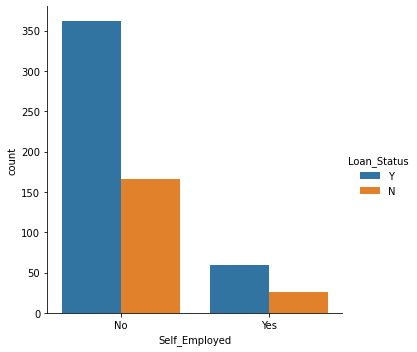

In [35]:
sns.factorplot('Self_Employed',kind='count',data=train,hue='Loan_Status',palette='tab10')

plt.show()

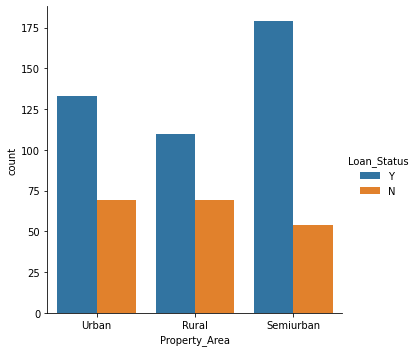

In [36]:
sns.factorplot('Property_Area',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

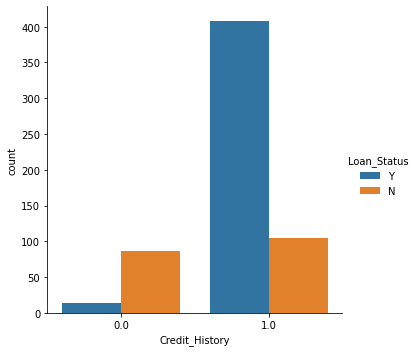

In [37]:
sns.factorplot('Credit_History',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

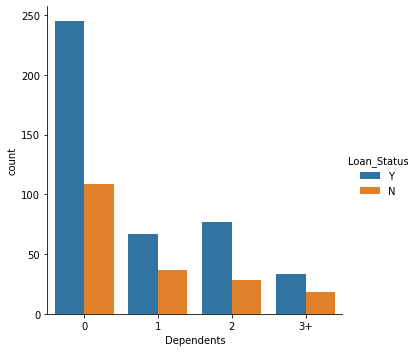

In [38]:
sns.factorplot('Dependents',kind='count',data=train,hue='Loan_Status',palette='tab10')
plt.show()

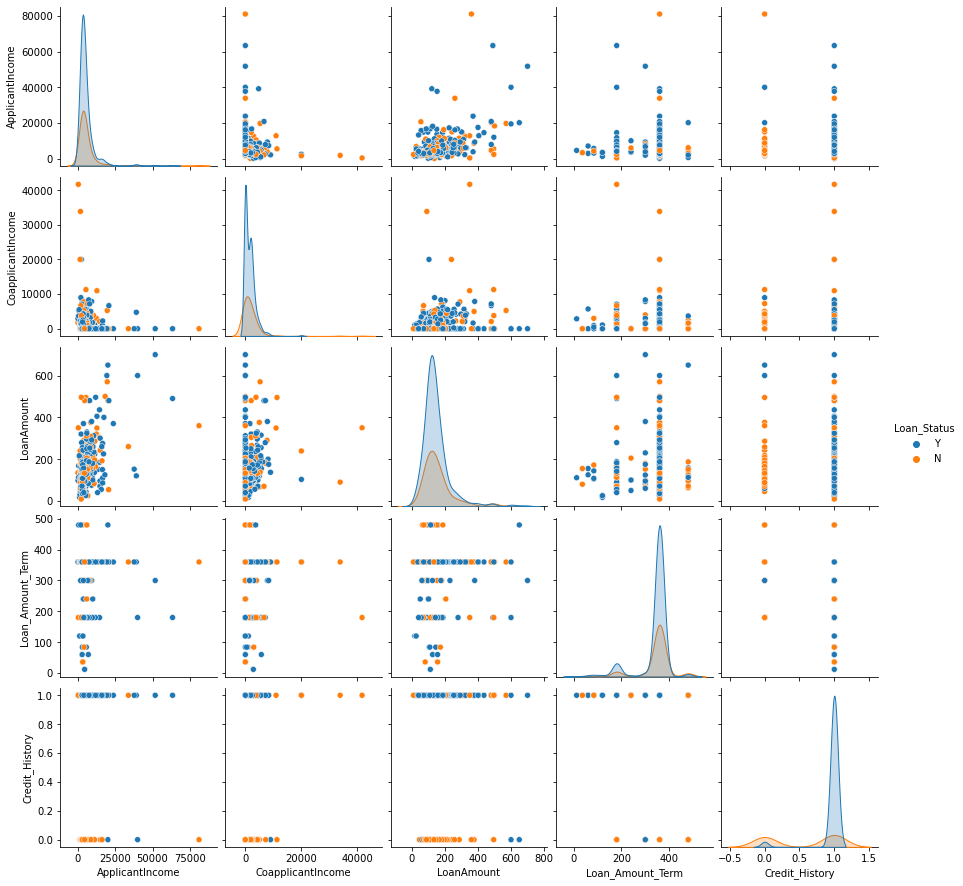

In [39]:
sns.pairplot(train,hue="Loan_Status",palette="tab10")
plt.show()

#### checking for outliers:

In [40]:
X = train.drop(columns = ['Loan_Status'])
y = train['Loan_Status']

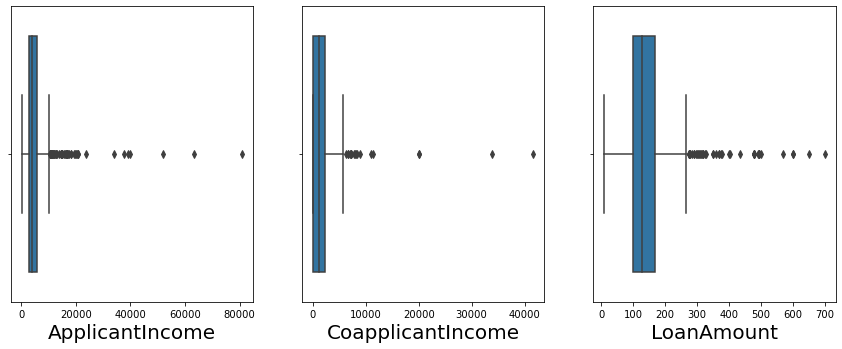

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [42]:
X.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.613890
Loan_Amount_Term    -2.293829
Credit_History      -1.814433
dtype: float64

outliers are present in the above columns

In [43]:
df1 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

In [44]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,128.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


#### Removing outliers:

In [45]:
# Features containing outliers
from scipy.stats import zscore
zscor = zscore(df1)
z_score_abs = np.abs(zscor)

df2 = df1[(z_score_abs < 3).all(axis=1)] 

In [46]:
df2.shape

(589, 3)

In [47]:
df1.shape

(614, 3)

In [48]:
# Data loss
loss=(614-589)/614 * 100
loss

4.071661237785016

4.071% data loss is acceptable

In [49]:
#Using IQR method

df = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()


In [50]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 
indxdrop

array([  9.,  34.,  54.,  67., 102., 106., 115., 119., 126., 128., 130.,
       138., 144., 146., 155., 171., 183., 185., 191., 199., 254., 258.,
       271., 278., 284., 308., 324., 333., 369., 370., 409., 424., 432.,
       438., 443., 467., 475., 478., 483., 487., 493., 506., 509., 525.,
       533., 534., 561., 572., 594., 604.,   9.,  12.,  38., 122., 135.,
       177., 180., 253., 349., 372., 402., 417., 444., 506., 513., 523.,
       581., 600.,   9.,  21.,  34.,  35.,  54.,  67., 126., 127., 130.,
       135., 155., 161., 171., 177., 233., 253., 258., 260., 278., 308.,
       324., 325., 333., 351., 369., 372., 381., 391., 409., 432., 487.,
       506., 514., 523., 524., 525., 536., 561., 572., 592., 600., 604.,
       605.])

In [51]:
indxdrop

array([  9.,  34.,  54.,  67., 102., 106., 115., 119., 126., 128., 130.,
       138., 144., 146., 155., 171., 183., 185., 191., 199., 254., 258.,
       271., 278., 284., 308., 324., 333., 369., 370., 409., 424., 432.,
       438., 443., 467., 475., 478., 483., 487., 493., 506., 509., 525.,
       533., 534., 561., 572., 594., 604.,   9.,  12.,  38., 122., 135.,
       177., 180., 253., 349., 372., 402., 417., 444., 506., 513., 523.,
       581., 600.,   9.,  21.,  34.,  35.,  54.,  67., 126., 127., 130.,
       135., 155., 161., 171., 177., 233., 253., 258., 260., 278., 308.,
       324., 325., 333., 351., 369., 372., 381., 391., 409., 432., 487.,
       506., 514., 523., 524., 525., 536., 561., 572., 592., 600., 604.,
       605.])

In [52]:
df = df.drop(indxdrop)

In [53]:
df.shape

(533, 3)

Data loss %:

In [54]:
loss=(614-535)/614 * 100
loss

12.866449511400651

12.86% data loss is outside acceptable range.

In [55]:
dropindx = X.index.difference(df2.index)
dropindx

Int64Index([  9, 126, 130, 155, 171, 177, 183, 185, 278, 308, 333, 369, 402,
            409, 417, 443, 487, 506, 523, 524, 561, 581, 600, 604, 605],
           dtype='int64')

In [56]:
train.drop(dropindx,inplace = True)

In [57]:
train.reset_index(drop=True,inplace = True)

In [58]:
train.shape

(589, 13)

#### Reducing skewness further using PowerTransformer

In [59]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [60]:
df3 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [61]:
transformed= powtrans.fit_transform(df3)
transformed = pd.DataFrame(transformed, columns=df3.columns)

In [62]:
transformed.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.018129
dtype: float64

In [63]:
transformed.index = X.index

In [64]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [65]:
train.skew()

ApplicantIncome     -0.005597
CoapplicantIncome   -0.171431
LoanAmount          -0.000461
Loan_Amount_Term    -2.355069
Credit_History      -1.812746
dtype: float64

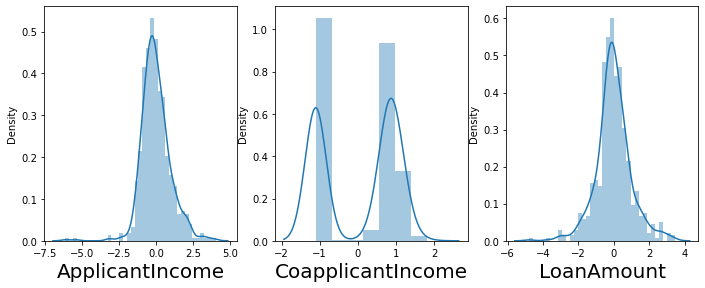

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(train[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [67]:
# Dropping the unwanted column fron train and test data
train.drop('Loan_ID', inplace=True, axis=1)
test.drop('Loan_ID', inplace=True, axis=1)

In [68]:
train['Gender']=train['Gender'].map({'Male':1,'Female':0})
train['Married'] = train['Married'].map({'No':0,'Yes':1}).astype(int)
train['Education'] = train['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
train['Credit_History'] = train['Credit_History'].astype(int)


In [69]:
test['Gender']=test['Gender'].map({'Male':1,'Female':0})
test['Married'] = test['Married'].map({'No':0,'Yes':1}).astype(int)
test['Education'] = test['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
test['Credit_History'] = test['Credit_History'].astype(int)


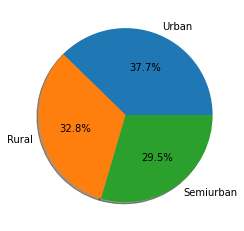

In [70]:
labels = 'Urban','Rural','Semiurban'
fig, ax = plt.subplots()
ax.pie(train['Property_Area'].value_counts(),labels = labels,radius =1,autopct = '%1.1f%%', shadow=True,)
plt.show()

In [71]:
train['Property_Area'] = train['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
train['Dependents'] = train['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [72]:
test['Property_Area'] = test['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
test['Dependents'] = test['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [73]:
# train['Loan_Status'].value_counts().plot.bar()

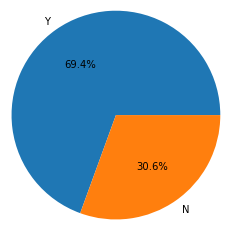

In [74]:
labels = 'Y','N'
fig, ax = plt.subplots()
ax.pie(train['Loan_Status'].value_counts(),labels = labels,radius =1.2,autopct = '%1.1f%%', shadow=False)
plt.show()


around 69%  people out of 614 got the approval.

Y : Has 68.73% of total values
N : Has 31.27% of total values

In [75]:
train['Loan_Status'] = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.544331,-1.102837,-0.029929,360.0,1,0,1
1,1,1,1,1,0,0.170974,0.750578,-0.029929,360.0,1,1,0
2,1,1,0,1,1,-0.499955,-1.102837,-1.301781,360.0,1,0,1
3,1,1,0,0,0,-0.743873,0.891686,-0.156033,360.0,1,0,1
4,1,0,0,1,0,0.582817,-1.102837,0.159936,360.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,0,0,1,0,-0.619524,0.825863,0.228586,360.0,1,1,1
585,1,1,3,1,0,0.065702,0.969260,0.553238,180.0,1,1,1
586,1,1,1,1,0,-0.937723,0.753457,-0.433988,360.0,1,0,1
587,1,1,2,1,0,-1.036365,-1.102837,-1.190847,360.0,1,0,1


In [76]:
# train.Loan_Amount_Term.unique()

In [77]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.544331,-1.102837,-0.029929,360.0,1,0,1
1,1,1,1,1,0,0.170974,0.750578,-0.029929,360.0,1,1,0
2,1,1,0,1,1,-0.499955,-1.102837,-1.301781,360.0,1,0,1
3,1,1,0,0,0,-0.743873,0.891686,-0.156033,360.0,1,0,1
4,1,0,0,1,0,0.582817,-1.102837,0.159936,360.0,1,0,1


In [78]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.386365,0.187461,-0.050416,0.014260,-0.042519,0.093870,0.045624,-0.088303,-0.001356,-0.086220,0.022543
Married,0.386365,1.000000,0.335631,-0.014816,-0.005505,-0.004715,-0.002380,0.024540,-0.096100,0.008725,-0.003430,0.090631
Dependents,0.187461,0.335631,1.000000,-0.068576,0.047513,-0.036058,0.040688,0.039964,-0.075088,-0.053625,0.008894,0.004278
Education,-0.050416,-0.014816,-0.068576,1.000000,0.003423,-0.011219,0.015323,0.000785,0.076247,0.088644,-0.002188,0.091275
Self_Employed,0.014260,-0.005505,0.047513,0.003423,1.000000,0.088169,-0.055850,0.068755,-0.055537,-0.008778,0.023602,-0.002634
ApplicantIncome,-0.042519,-0.004715,-0.036058,-0.011219,0.088169,1.000000,-0.356046,0.473421,0.008998,0.003536,0.006201,0.005463
CoapplicantIncome,0.093870,-0.002380,0.040688,0.015323,-0.055850,-0.356046,1.000000,0.153047,0.001568,-0.027627,-0.023146,0.022641
LoanAmount,0.045624,0.024540,0.039964,0.000785,0.068755,0.473421,0.153047,1.000000,-0.022952,0.025671,-0.020052,0.011151
Loan_Amount_Term,-0.088303,-0.096100,-0.075088,0.076247,-0.055537,0.008998,0.001568,-0.022952,1.000000,-0.030076,0.072087,-0.039600
Credit_History,-0.001356,0.008725,-0.053625,0.088644,-0.008778,0.003536,-0.027627,0.025671,-0.030076,1.000000,0.020627,0.550070


<AxesSubplot:>

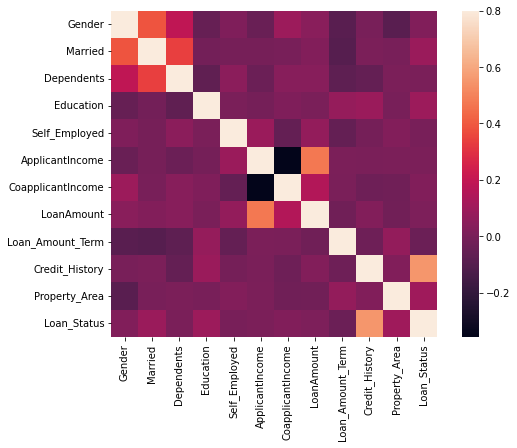

In [79]:
plt.subplots(figsize=(9, 6)) 
sns.heatmap(train.corr(), vmax=.8, square=True)


In [80]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.544331,-1.102837,-0.029929,360.0,1,0,1
1,1,1,1,1,0,0.170974,0.750578,-0.029929,360.0,1,1,0
2,1,1,0,1,1,-0.499955,-1.102837,-1.301781,360.0,1,0,1
3,1,1,0,0,0,-0.743873,0.891686,-0.156033,360.0,1,0,1
4,1,0,0,1,0,0.582817,-1.102837,0.159936,360.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,0,0,1,0,-0.619524,0.825863,0.228586,360.0,1,1,1
585,1,1,3,1,0,0.065702,0.969260,0.553238,180.0,1,1,1
586,1,1,1,1,0,-0.937723,0.753457,-0.433988,360.0,1,0,1
587,1,1,2,1,0,-1.036365,-1.102837,-1.190847,360.0,1,0,1


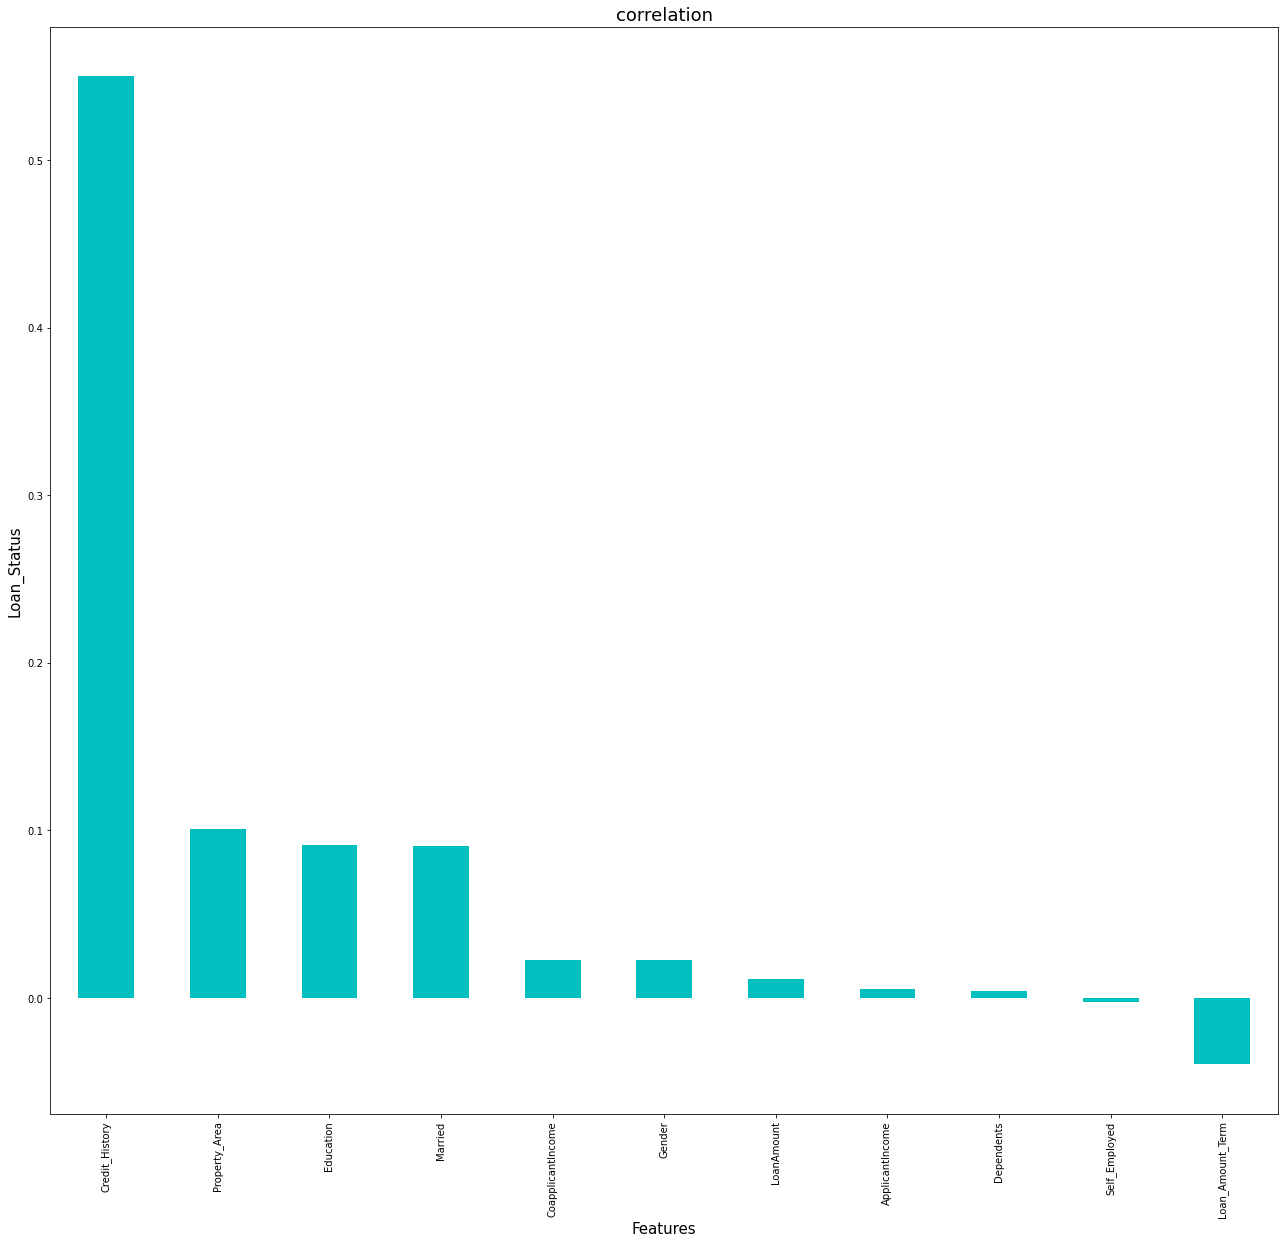

In [81]:
# Visualizing correlation of feature columns with label column.
plt.figure(figsize = (22,20))
train.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Loan_Status',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
X = train.drop(columns = ['Loan_Status'])
y = train['Loan_Status']


In [84]:
scaler= StandardScaler()
# scaled_X = scaler.fit_transform(X)
# scaled_X

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif = pd.DataFrame()

In [87]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [88]:
vif

,Features,vif
0,Gender,5.843339
1,Married,3.646110
2,Dependents,1.775889
3,Education,4.328001
4,Self_Employed,1.169960
5,ApplicantIncome,1.712130
6,CoapplicantIncome,1.364822
7,LoanAmount,1.535408
8,Loan_Amount_Term,10.418505
9,Credit_History,5.455795


In [89]:
# Principle Component Analysis
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=11)
new_comp = pca.fit_transform(X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(11))
principle_x

,0,1,2,3,4,5,6,7,8,9,10
0,-18.030947,0.827013,1.109988,-0.405299,1.104353,0.187414,0.272491,-0.195615,-0.118118,0.011680,-0.518410
1,-18.030014,-0.159506,-0.671497,0.043285,0.045613,-0.458789,-0.366320,-0.269045,-0.118536,-0.107952,-0.008396
2,-18.030250,-0.631469,1.690012,0.027872,1.145300,0.165265,-0.526150,-0.238764,0.036784,0.876103,0.283980
3,-18.029671,-0.924149,-0.387411,-0.922719,1.000814,0.020049,-0.509906,0.730871,-0.389764,-0.056865,0.181057
4,-18.030886,0.960990,1.005816,-0.443331,1.098504,0.272133,0.276584,-0.192525,-0.114128,0.006422,-0.518315
...,...,...,...,...,...,...,...,...,...,...,...
584,-18.032197,-0.578648,-0.352356,-1.191101,-0.064573,0.192627,0.788571,-0.272900,-0.126596,-0.216278,0.329345
585,161.972187,-0.085043,-1.826330,1.417768,-0.095552,-0.286029,0.175540,-0.413873,-0.111434,-0.201061,-0.081529
586,-18.029077,-1.217467,-0.541057,0.031484,1.052230,0.028414,-0.321638,-0.258693,-0.112924,-0.082698,0.042878
587,-18.028133,-1.083565,0.797651,1.741254,1.219505,0.491591,-0.120592,-0.292959,-0.110370,-0.095380,-0.060721


In [91]:
X = train.drop(columns = ['Loan_Status'])
y = train['Loan_Status']


In [92]:
scaled_xtrain = scaler.fit_transform(principle_x)

In [93]:
scaled_xtrain

array([[-0.27617232,  0.67412518,  1.02945546, ..., -0.32527066,
         0.03411074, -1.60497457],
       [-0.27615802, -0.1300185 , -0.62277802, ..., -0.32642389,
        -0.31525372, -0.02599335],
       [-0.27616165, -0.5147312 ,  1.56739643, ...,  0.10129438,
         2.55850684,  0.87918995],
       ...,
       [-0.27614368, -0.99239743, -0.50180198, ..., -0.3109677 ,
        -0.24150594,  0.13274756],
       [-0.27612921, -0.88324927,  0.73977905, ..., -0.3039348 ,
        -0.27853927, -0.18798886],
       [-0.27620939,  0.24363398,  1.45631953, ...,  2.60083758,
         1.81916407,  1.44972211]])

In [94]:
#scaling test dataset
scaler= StandardScaler()
scaled_test = scaler.fit_transform(test)
scaled_test

array([[ 0.51104636,  0.75835829, -0.78520333, ...,  0.27131128,
         0.44648226, -1.12247451],
       [ 0.51104636,  0.75835829,  0.1413871 , ...,  0.27131128,
         0.44648226, -1.12247451],
       [ 0.51104636,  0.75835829,  1.06797753, ...,  0.27131128,
         0.44648226, -1.12247451],
       ...,
       [ 0.51104636, -1.31863792, -0.78520333, ...,  0.27131128,
         0.44648226,  1.27955549],
       [ 0.51104636,  0.75835829, -0.78520333, ...,  0.27131128,
         0.44648226,  0.07854049],
       [ 0.51104636, -1.31863792, -0.78520333, ..., -2.49285026,
         0.44648226,  0.07854049]])

This is a Classification problem since Target/ Lable column ('Loan_Status') has Categorical type of Data.


### Classification Model Building

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
#finding best random state

In [97]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_xtrain,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8688524590163934 on random_state: 26


In [98]:
x_train,x_test,y_train,y_test = train_test_split(scaled_xtrain,y,test_size = .31, stratify = y,random_state = 26)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve 

In [100]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
x_train.shape

(406, 11)

In [102]:
x_test.shape

(183, 11)

In [103]:
y_train.shape

(406,)

### Training the models

In [104]:
y_test.shape

(183,)

In [105]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
LOGR= LogisticRegression()
LOGR.fit(x_train,y_train)

LogisticRegression()

In [107]:
SV =  SVC()
SV.fit(x_train,y_train)

SVC()

In [108]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)

[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Logistic Regression Model Accuracy

In [110]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [111]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[ 33,  23],
       [  1, 126]], dtype=int64)

In [112]:
print(accu)

              precision    recall  f1-score   support

           0       0.97      0.59      0.73        56
           1       0.85      0.99      0.91       127

    accuracy                           0.87       183
   macro avg       0.91      0.79      0.82       183
weighted avg       0.88      0.87      0.86       183



Random Forest Classifier Model Accuracy

In [113]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [114]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[ 31,  25],
       [  8, 119]], dtype=int64)

In [115]:
print(accu)

              precision    recall  f1-score   support

           0       0.79      0.55      0.65        56
           1       0.83      0.94      0.88       127

    accuracy                           0.82       183
   macro avg       0.81      0.75      0.77       183
weighted avg       0.82      0.82      0.81       183



XGB Classifier Model Accuracy

In [116]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [117]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[ 28,  28],
       [ 12, 115]], dtype=int64)

In [118]:
print(accu)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        56
           1       0.80      0.91      0.85       127

    accuracy                           0.78       183
   macro avg       0.75      0.70      0.72       183
weighted avg       0.77      0.78      0.77       183



SV Classifier Model Accuracy

In [119]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[ 31,  25],
       [  1, 126]], dtype=int64)

In [120]:
print(accu)

              precision    recall  f1-score   support

           0       0.97      0.55      0.70        56
           1       0.83      0.99      0.91       127

    accuracy                           0.86       183
   macro avg       0.90      0.77      0.81       183
weighted avg       0.88      0.86      0.84       183



K Nearest Neighbours Classifier Model Accuracy

In [121]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [122]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[ 32,  24],
       [  8, 119]], dtype=int64)

In [123]:
print(accu)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        56
           1       0.83      0.94      0.88       127

    accuracy                           0.83       183
   macro avg       0.82      0.75      0.77       183
weighted avg       0.82      0.83      0.82       183



### Model Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score as cvs

In [125]:
# Logistic Regression

In [126]:
print(cvs(LOGR,scaled_xtrain,y,cv=5).mean()) 

0.8183688251484862


In [127]:
# Random Forest Classifier
print(cvs(RFC,scaled_xtrain,y,cv=5).mean())

0.7759524844270608


In [128]:
# XGB Classifier
print(cvs(XGBC,scaled_xtrain,y,cv=5).mean())

[18:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [129]:
# SV Classifier
print(cvs(SV,scaled_xtrain,y,cv=5).mean())

0.8149789946400116


In [130]:
# K Nearest Neighbours Classifier
print(cvs(KNN,scaled_xtrain,y,cv=5).mean())

0.782703172533681


Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Logistic Regression is the best model.

### ROC AUC Scores

In [131]:
# Logistic Regression
roc_auc_score(y_test,LOGRpred)

0.7907058492688414

In [132]:
# SV Classifier
roc_auc_score(y_test,SVpred)

0.7728487064116987

In [133]:
# Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.7452896512935885

In [134]:
# XGB Classifier
roc_auc_score(y_test,XGBCpred)

0.702755905511811

In [135]:
# K Nearest Neighbours Classifier
roc_auc_score(y_test,KNNpred)

0.7542182227221597

### AUC ROC CURVE

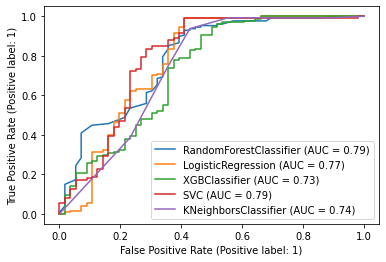

In [136]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()


Based on the above graph and roc_auc_scores, Logistic Regression is the best model for the dataset, with AUC = 0.79 and roc_auc_score = 0.74

### Hyper Parameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
parameter = {'C':[0.001,0.01,0.1,0,1,1.1],'penalty':['l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3,5,10,20,45],'solver':['liblinear'],'max_iter':[100,200,300,400,500],'multi_class':['auto', 'ovr', 'multinomial']}

In [139]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)

In [140]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 1.1],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 5, 10, 20, 45],
                         'solver': ['liblinear']},
             verbose=2)

In [141]:
GridCV.best_params_

{'C': 0.001,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [142]:
Best_mod1 = LogisticRegression(C = 0.001,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

86.33879781420765


Logistic Regression has an accuracy score of 86.33%

In [143]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[ 32,  24],
       [  1, 126]], dtype=int64)

### Saving The Model

In [144]:
import joblib
joblib.dump(Best_mod1,"BestModelLoan.pkl")

['BestModelLoan.pkl']

### Loading The Model

In [145]:
mod=joblib.load("BestModelLoan.pkl")

In [146]:
print(mod.predict(x_test))

[1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]


In [147]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
123,1,1
256,1,1
588,0,0
335,0,0
543,0,0
230,1,1
388,0,0
486,1,0
212,0,0
577,1,1


In [148]:
x_test.shape

(183, 11)

In [149]:
y_test.shape

(183,)

In [150]:
scaled_test.shape

(367, 11)

In [151]:
y_test.shape

(183,)

### Predicting using the test Dataset

In [152]:
y_pred = mod.predict(scaled_test)

In [153]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [154]:
y_pred.shape

(367,)

In [155]:
# test_features=y_pred
# pred = grid.predict(test_features)
# predicted_values=pd.DataFrame(pred)
# # predicted_values.to_csv 